In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(2) Is the dataset class-balanced?

In [5]:
# see if dataset is balanced
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
counts= df.Outcome.value_counts()
baseline_accuracy = round(counts[0]/(counts[0]+counts[1]), 3)
print("Baseline Accuracy is:", baseline_accuracy)

# a trained ML model should do better than 65.1%, otherwise it's useless

Baseline Accuracy is: 0.651


In [7]:
# Store all the features into variable "X"
# X = df.iloc[:,0:8].values
X = df.drop("Outcome", axis='columns').values

# Store the output class values into variable "y" 
y = df.Outcome.values

# Split your X and y data using train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

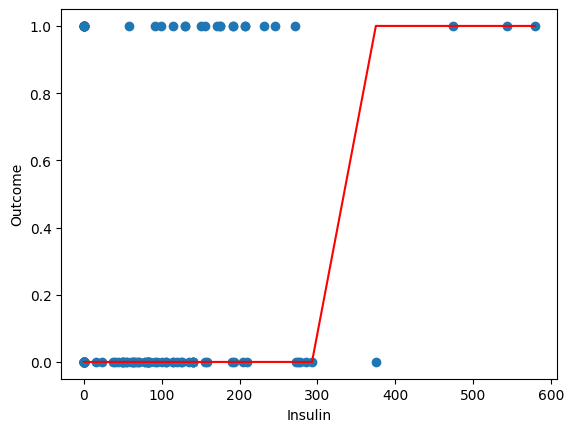

In [8]:
# create a LogisticRegression model without regularization 
LR1 = LogisticRegression(penalty=None, max_iter=10000)

# obtain training data and test data  
xtrain = Xtrain[:,4].reshape(-1, 1)
xtest = Xtest[:,4].reshape(-1, 1)

# alternatively:
# xtrain = Xtrain[:,[4]]
# xtest = Xtest[:,[4]]

# fit to your training data using Logistic Regression 
LR1.fit(xtrain, ytrain)

# create a scatter plot of the test data. 
plt.scatter(xtest, ytest)
plt.xlabel('Insulin')
plt.ylabel('Outcome')

# also plot your prediction using sns.lineplot
# lineplot needs 1d vector x
ypred = LR1.predict(xtest)
sns.lineplot(x=xtest.reshape(-1), y=ypred,color="red") 
plt.show()

## Question 2.3 [ _ /10 marks]
Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.

In [9]:
# to find accuracy, recall, precision, sensitivity, and specificity
def compute_performance(yhat, y, classes):
    # get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    precision = tp / (tp + fp)
    
    # Recall
    recall = tp / (tp + fn)    
    
    # Sensitivity
    sensitivity = recall
    
    # Specificity
    specificity = tn / (fp + tn)
    
    
    print("Accuracy:",round(acc,6),"Recall:",round(recall,6),"Precision:",round(precision,6),
          "Sensitivity:",round(sensitivity,6),"Specificity:",round(specificity,6))


compute_performance(ypred, ytest, LR1.classes_)

tp: 3 tn: 106 fp: 1 fn: 44
Accuracy: 0.707792 Recall: 0.06383 Precision: 0.75 Sensitivity: 0.06383 Specificity: 0.990654


In [12]:
# create a LogisticRegression model without regularization 
LR2 = LogisticRegression(penalty=None, max_iter=10000)

# fit to your training data using Logistic Regression 
LR2.fit(Xtrain, ytrain)

# compute your test predictions, given test inputs 
ypred2 = LR2.predict(Xtest)

# Evaluate the performance
compute_performance(ypred2, ytest, LR2.classes_)

tp: 29 tn: 98 fp: 9 fn: 18
Accuracy: 0.824675 Recall: 0.617021 Precision: 0.763158 Sensitivity: 0.617021 Specificity: 0.915888


In [13]:
# adjust the decision threshold from 0.5 (default) to 0.4, and then evlaute the performance and get the updated predictions 
threshold = 0.4
ytest_prob = LR2.predict_proba(Xtest)
ypred_new = LR2.classes_[(ytest_prob[:,1] > threshold).astype(int)]


# Evaluate the performance
compute_performance(ypred_new, ytest, LR2.classes_)

tp: 34 tn: 88 fp: 19 fn: 13
Accuracy: 0.792208 Recall: 0.723404 Precision: 0.641509 Sensitivity: 0.723404 Specificity: 0.82243


In [14]:
# adjust the decision threshold from 0.5 (default) to 0.6, and then evlaute the performance and get the updated predictions 

threshold = 0.6
ytest_prob = LR2.predict_proba(Xtest)
ypred_new = LR2.classes_[(ytest_prob[:,1] > threshold).astype(int)]


# Evaluate the performance
compute_performance(ypred_new, ytest, LR2.classes_)

tp: 26 tn: 100 fp: 7 fn: 21
Accuracy: 0.818182 Recall: 0.553191 Precision: 0.787879 Sensitivity: 0.553191 Specificity: 0.934579


 the better threshold should be determined in accordance with context and requirements of the project. This may involve consulting the project stakeholders. For example, depending on the project appetite for Recall, the model with highest accuracy meeting that appetite could be a good choice.

In [15]:
# LogisticRegression model with l2 regularization (`LogisticRegression` model with `penalty=l2`, `C=0.01`) 
LR3 = LogisticRegression(penalty="l2", solver='lbfgs', multi_class='ovr', C=0.01, max_iter=10000)

# Fit to your training data using Logistic Regression 
LR3.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
ypred3 = LR3.predict(Xtest)

# Evaluate the performance
compute_performance(ypred3, ytest, LR3.classes_)

tp: 28 tn: 97 fp: 10 fn: 19
Accuracy: 0.811688 Recall: 0.595745 Precision: 0.736842 Sensitivity: 0.595745 Specificity: 0.906542


/Users/nouransakr/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


AUC Q2.2 Model: 0.536| AUC Q3.1 Model: 0.867| AUC Q3.3 Model: 0.853


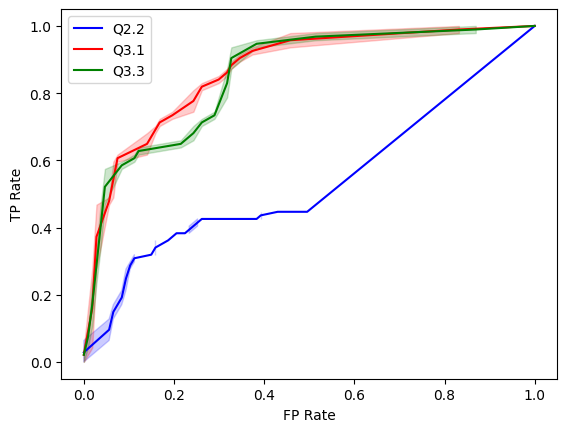

In [16]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers 
fpr1, tpr1, _ = roc_curve(ytest, LR1.predict_proba(xtest)[:,1], pos_label=1)
fpr2, tpr2, _ = roc_curve(ytest, LR2.predict_proba(Xtest)[:,1], pos_label=1)
fpr3, tpr3, _ = roc_curve(ytest, LR3.predict_proba(Xtest)[:,1], pos_label=1)

# Plot all of the ROC curves 
ax = sns.lineplot(x=fpr1, y=tpr1, color="blue",  label='Q2.2')
ax = sns.lineplot(x=fpr2, y=tpr2, color="red",   label='Q3.1')
ax = sns.lineplot(x=fpr3, y=tpr3, color="green", label='Q3.3')
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")

# Determine AUC for each of the ROC curves 
print(f"AUC Q2.2 Model: {auc(fpr1, tpr1).round(3)}| AUC Q3.1 Model: {auc(fpr2, tpr2).round(3)}| AUC Q3.3 Model: {auc(fpr3, tpr3).round(3)}")

the best classifier is the LR classifier using all input features and with no regularization.